In [52]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
ds = pd.read_excel('customer_churn_large_dataset.xlsx')

In [53]:
ds.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [54]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [55]:
ds.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<Axes: xlabel='Location', ylabel='count'>

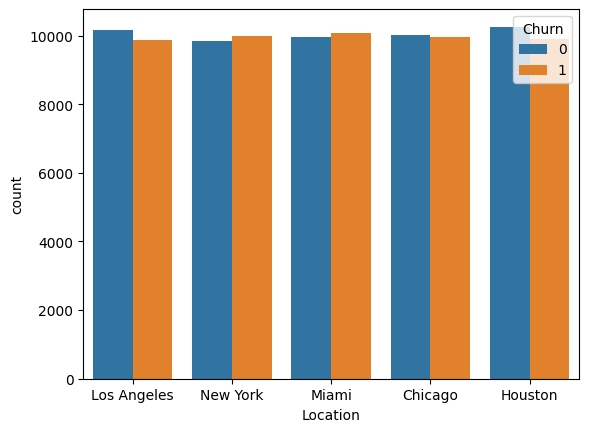

In [56]:
sns.countplot(x = 'Location', hue='Churn', data=ds)

<Axes: xlabel='Gender', ylabel='count'>

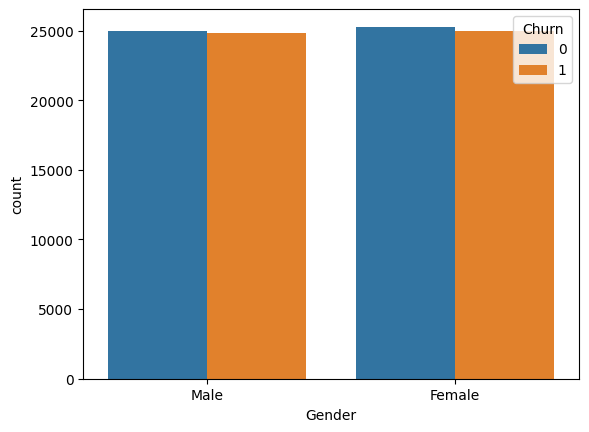

In [57]:
sns.countplot(x = 'Gender', hue='Churn', data=ds)

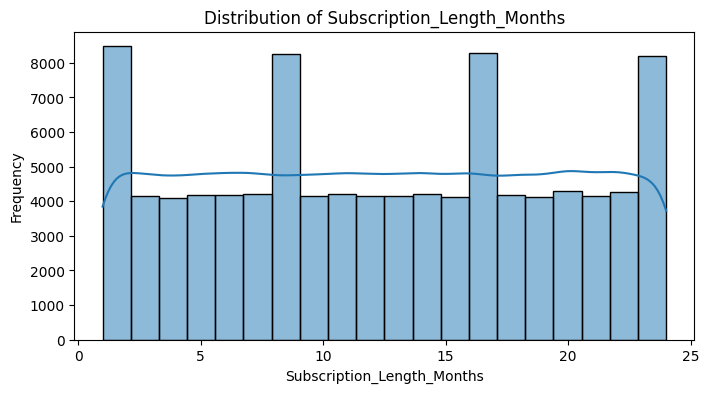

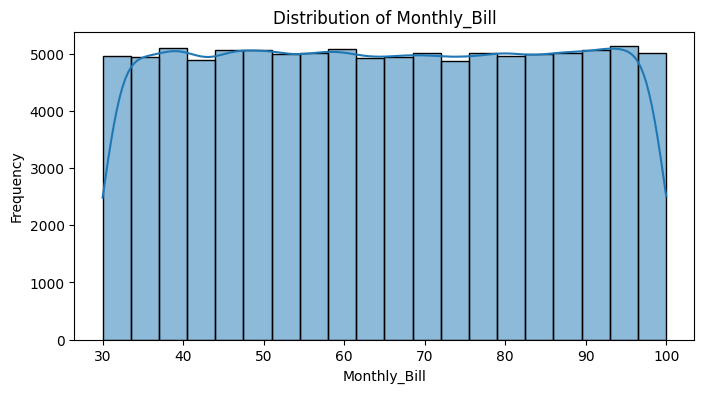

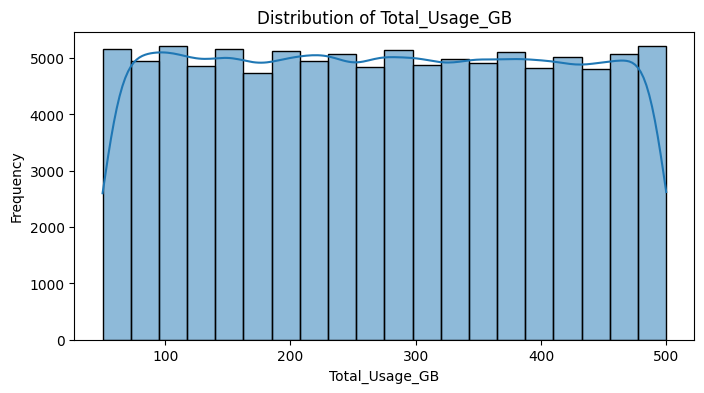

In [58]:
col_dis = ['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
for col in col_dis:
    plt.figure(figsize=(8, 4))
    sns.histplot(ds[col], bins = 20, kde = True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()         

In [59]:
ds.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

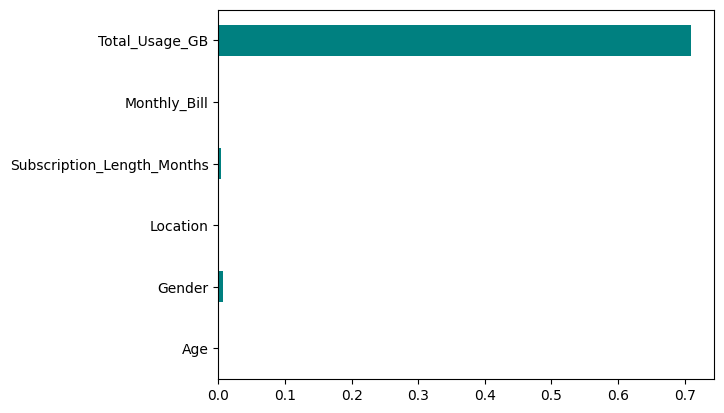

In [60]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
y = ds['Churn']
X = ds.drop(['CustomerID','Name','Location'], axis=1)
X.replace({'Gender':{'Female':0,'Male':1}},inplace=True)
importance = mutual_info_classif(X,y)
feat_imp = pd.Series(importance, ds.columns[2:len(ds.columns)-1])
feat_imp.plot(kind = 'barh', color = 'teal')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.7)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((30000, 6), (70000, 6), (30000,), (70000,))

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\sarth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, precision_score, recall_score
accuracy_score(y_test,y_pred)

1.0

In [64]:
confusion_matrix(y_test,y_pred)

array([[35138,     0],
       [    0, 34862]], dtype=int64)

In [69]:
precision_recall_curve(y_test,y_pred)

(array([0.49802857, 1.        , 1.        ]),
 array([1., 1., 0.]),
 array([0, 1], dtype=int64))

In [70]:
precision_score(y_test,y_pred)

1.0

In [71]:
recall_score(y_test,y_pred)

1.0

In [78]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [80]:
confusion_matrix(y_test,y_pred)

array([[35138,     0],
       [    0, 34862]], dtype=int64)

In [67]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0